Nano Energy Materials in-class exercise
===========================


Abstract
-------------
This notebook demonstrates the calculation of surface area of a platinum electrode by CO stripping, a useful and illustrative technique in catalysis. It requires an internet connection and access to Github to read the data, as well as installation of the `numpy`, `pint`, `scipy`, `matplotlib` and `ixdat` packages, all available from the python package index. Output is included in order to demonstrate use of these packages, while blank cells are left where the student should apply their understanding of catalysis and surface science to work the problem.


setting up units
-------------------
We will use the `numpy` package for math, the `pint` package to help us keep track of units, the `scipy` package for natural constants (here the fundamental charge), and the `matplotlib` package for plotting. They are initiated like this:

In [1]:
import numpy as np
from pint import UnitRegistry
from scipy.constants import e
from matplotlib import pyplot as plt


u = UnitRegistry()
u.setup_matplotlib()  # this will get units to automatically show up on plots

# scipy doesn't work with units, so we put the SI unit here:
e = e * u("C")  
print(e)  # looks good!

1.602176634e-19 coulomb


While defining constants, lets put in Platinum's lattice parameter:

In [2]:
a0 = 3.92 * u("Å")  # Pt's fcc lattice parameter

print(a0.to("m"))  # looks good! (apparently pint speaks Danish)

3.92e-10 meter


The area per Pt atom on the (111) surface
---------------------

For the surface area calculation, we'll assume a (111) surface.

**Problem:** Draw the Pt(111) surface and calculate the area per atom by drawing a 2-D unit cell and calculating its area in terms of the unit cell parameter, `a0`.

The charge per area in a CO stripping on Pt
-----------------------------------------

When exposed to 1 atmoshere of CO, Pt(111) saturates to about a 3/4 coverage. 
(from Trimarco and Scott, et al, Electrochimica Acta 268 (2018) 520, https://doi.org/10.1016/j.electacta.2018.02.060)

In [3]:
theta_CO = 3/4

**Problem:** What is the average area per CO molecule on the surface?

**Problem:** How many electrons are transferred for each adsorbed CO molecule when it gets oxidized off of the surface? 
(Write the balanced reaction)

**Problem:** Now, put the above answers together: what is the charge transferred per area when oxidizing an adsorbed layer of CO from Pt(111)?
Give your answer in microcoulombs per square centimeter.

Importing and plotting the CO stripping data
------------------------------------------

For reading the exported data, we use a python package developed for energy materials science data analysis, `ixdat`.

You will need to install `ixdat`. It's done the same way as you did for `pint`:
open the Anaconda Prompt, and type
`pip install ixdat`

We'll use ixdat to import the data directly from the web page where it is hosted:

importing ixdat v0.2.7.dev1 from C:\Users\Søren\git\ixdat\src\ixdat\__init__.py
skipping the following line:
ixdat version = 0.2.7.dev1

skipping the following line:
backend_name = BackendBase(none, address=none)



[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V]'>,
 <Axes: ylabel='<I>/mA'>]

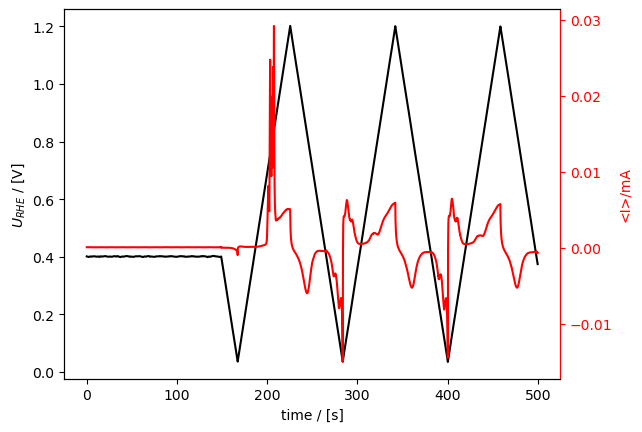

In [4]:
from ixdat import Measurement

meas = Measurement.read_url(
    "https://raw.githubusercontent.com/ScottSoren/NanoEnergyMaterials/main/co_strip.csv", reader="ixdat"
)

meas.plot()

`ixdat` always provides a default way of plotting data that it imports, as shown above by `meas.plot`

We will, however, plot the data ourselves to be in full control:

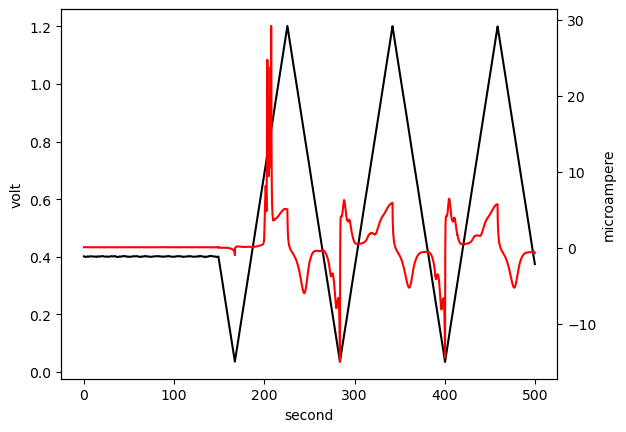

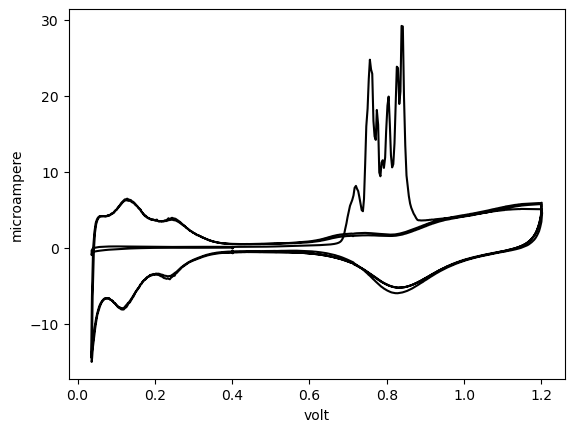

In [5]:
t = meas.t * u("s")
U = meas.potential.data * u("V")
I = meas.current.data * u("mA")

# actually, mA is a bit of a big unit for this data.
I.ito("uA")  # adjusts units ("i" is for "in-place")

# one plot of potential and current vs time, same as above:
fig1, ax1 = plt.subplots()
ax1.plot(t, U, "black")
ax2 = ax1.twinx()
ax2.plot(t, I, "red")

# and another of current vs potential:
fig3, ax3 = plt.subplots()
ax3.plot(U, I, "black")

Notice that the axes were labeled automatically with the units.

Selecting and integrating the data
----------------------------

The CO stripping peak is in the first anodic scan, at about 190-220 seconds. The base current is at the corresponding part of the second anodic scan. 

Select the data to integrate, and plot it to make sure it's right. It's done for the peak. Can you do it for the base?

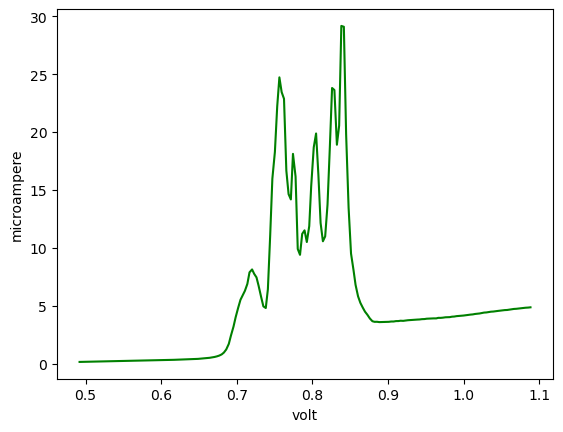

In [7]:
tspan_strip = [190, 220] * u("s")
mask_strip = np.logical_and(tspan_strip[0] < t, t < tspan_strip[1])

t_strip = t[mask_strip]
U_strip = U[mask_strip]
I_strip = I[mask_strip]

# check that we got it right:
fig4, ax4 = plt.subplots()
ax4.plot(U_strip, I_strip, "g")
# co-plot the corresponding part of the base current, selected from the subsequent cycle, with this line:
#  ax4.plot(U_base, I_base, "k--") 


**Problem:** What is the area of the peak, minus the base current, in microcoulombs? (consider using `np.trapz` for numerical integration)

Calculating the surface area
----------------------------------
**Problem:** And what is the corresponding electrode area? (Use results from above)